In [1]:
import sys,os
os.environ['pRT_input_data_path'] = '/Users/nasedkin/python-packages/petitRADTRANS/petitRADTRANS/input_data/'
os.environ["OMP_NUM_THREADS"] = "1"
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
from petitRADTRANS.retrieval import plot_style as ps
import scicomap as sc
from astropy.io import fits
plt.rcParams['legend.title_fontsize'] = '20'


species v0.6.0
Working folder: /Users/nasedkin/Documents/Paper2_HR8799_Notebooks
Configuration settings:
   - Database: /Users/nasedkin/Documents/Paper2_HR8799_Notebooks/species_database.hdf5
   - Data folder: /Users/nasedkin/Documents/Paper2_HR8799_Notebooks/data
   - Interpolation method: linear
   - Magnitude of Vega: 0.03
Using pRT Plotting style!


In [2]:
data_dir = "observations/"
qual_map = sc.ScicoQualitative(cmap='538')
fixed_cmap = qual_map.get_mpl_color_map()
colour_dict = {"HR8799b":fixed_cmap(3/6),
              "HR8799c":fixed_cmap(2/6),
              "HR8799d":fixed_cmap(1/6),
              "HR8799e":fixed_cmap(0/6)}
spectra = {}
distance_scale = (41.2925/10)**2
ylabel = r"F$_{\lambda}$ + offset [W/m$^{2}$/$\mu$m]"
xlabel = "Wavelength [micron]"
version = "v05"

/Users/nasedkin/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


observations/HR8799b_GRAVITY.fits
Filename: observations/HR8799b_GRAVITY.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      11   ()      
  1  SPECTRUM      1 BinTableHDU     24   233R x 5C   [1D, 1D, 233D, 1D, 233D]   
observations/HR8799c_GRAVITY.fits
Filename: observations/HR8799c_GRAVITY.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      11   ()      
  1  SPECTRUM      1 BinTableHDU     24   233R x 5C   [1D, 1D, 233D, 1D, 233D]   
observations/HR8799d_GRAVITY.fits
Filename: observations/HR8799d_GRAVITY.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      11   ()      
  1  SPECTRUM      1 BinTableHDU     24   233R x 5C   [1D, 1D, 233D, 1D, 233D]   
observations/HR8799e_GRAVITY.fits
Filename: observations/HR8799e_GRAVITY.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      11  

/Users/nasedkin/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Text(0, 0.5, 'F$_{\\lambda}$ + offset [W/m$^{2}$/$\\mu$m]')

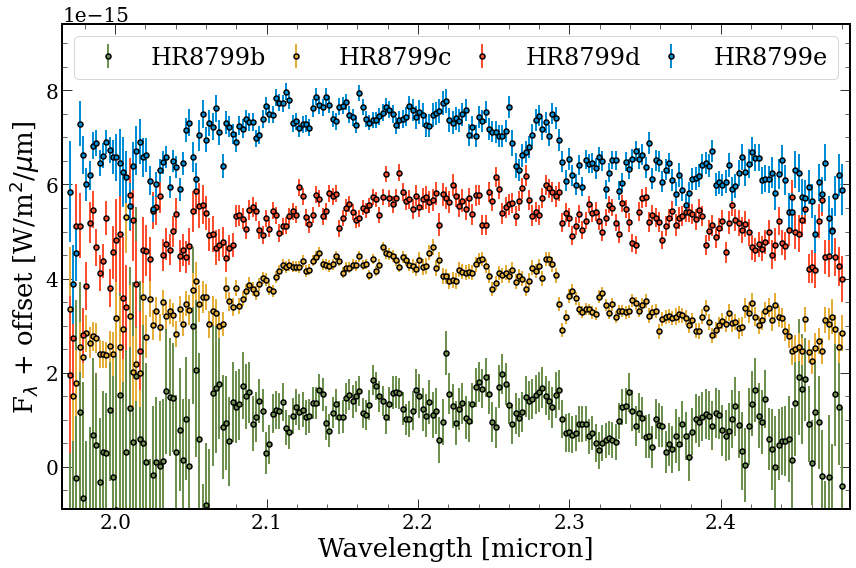

In [5]:
# GRAVITY
instrument = "GRAVITY"
scale = distance_scale

files = sorted(glob(f"{data_dir}*{instrument}*"))
hduls = []
names = []
for f in files:
    print(f)
    names.append(f.split(data_dir)[-1].split('_')[0])
    #if not "GRAVITY" in f.split('/')[-1]:
    #    continue
    hdul = fits.open(f)
    hdul.info()
    hduls.append(hdul)
    if "HR8799e" in f:
        h = hdul[0].header
    spectrum = np.array(hdul[1].data)
    
fig,ax = plt.subplots(figsize = (12,8))

for i,h in enumerate(hduls):
    offset = i * 1.5e-15
    if not instrument in spectra.keys():
        spectra[instrument] = {}
    spectra[instrument][names[i]] = {"WAVELENGTH": h[1].data["WAVELENGTH"],
                                     "FLUX":h[1].data["FLUX"]*scale,
                                     "ERROR":np.sqrt(np.diag(h[1].data["COVARIANCE"]))*scale}
    ax.errorbar(h[1].data["WAVELENGTH"],
                h[1].data["FLUX"]*scale +offset,
                yerr = np.sqrt(np.diag(h[1].data["COVARIANCE"]))*scale,
                label = names[i],
                marker = 'o',
                markersize = 5,
                markeredgewidth=1.5,
                linewidth = 0,
                elinewidth = 2,
                markeredgecolor = 'k',
                color = colour_dict[names[i]])
    print(names[i], np.mean((h[1].data["FLUX"]*scale)/(np.sqrt(np.diag(h[1].data["COVARIANCE"]))*scale)))
ax.legend(loc='upper center',ncol=4, mode='expand')

# Formatting
ax.set_xlim(min(hduls[0][1].data['WAVELENGTH'])-0.005,max(hduls[0][1].data['WAVELENGTH'])+0.005)
ax.set_ylim(-9e-16,9.4e-15)

ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)

#plt.savefig(f"plots/HR8799_{instrument}_pub_spectra_{version}.pdf",bbox_inches = 'tight')

HR8799e_SPHEREYJH_KLIP_2023_spectrum.fits
HR8799d_SPHEREYJH_KLIP_2023_spectrum.fits
PACO_FLASSEUR_HR8799c_2016.txt


/Users/nasedkin/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Text(0, 0.5, 'F$_{\\lambda}$ + offset [W/m$^{2}$/$\\mu$m]')

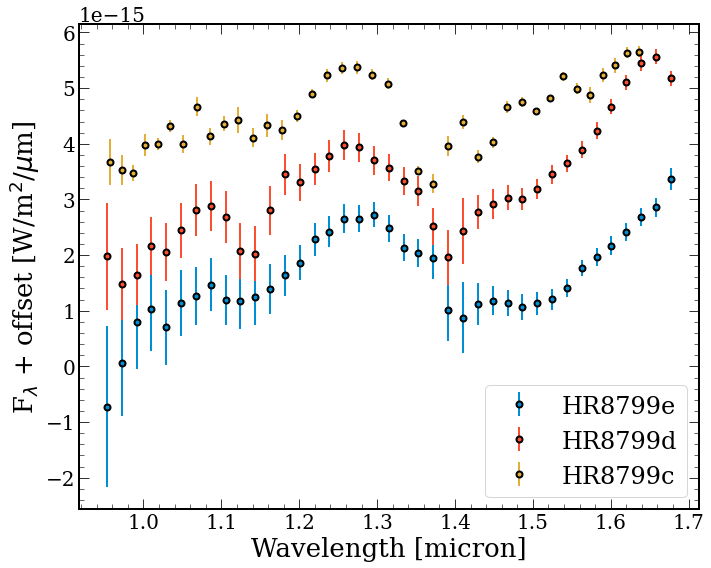

In [20]:
#SPHERE
instrument = "SPHERE"
scale = 1

files = ["HR8799e_SPHEREYJH_KLIP_2023_spectrum.fits",
         "HR8799d_SPHEREYJH_KLIP_2023_spectrum.fits",
         "PACO_FLASSEUR_HR8799c_2016.txt"]
hduls = []
data = []
names = ["HR8799e","HR8799d","HR8799c"]
for f in files:
    print(f)
    if f.endswith(".fits"):
        #names.append(f.split(data_dir)[-1].split('_')[1])
        hdul = fits.open(f"{data_dir}{f}")
        hduls.append(hdul)
    else: 
        #names.append(f.split(data_dir)[-1].split('_')[2])
        data.append(np.genfromtxt(f"{data_dir}{f}").T)
data = np.array(data)
fig, ax = plt.subplots(figsize = (10,8))


for i,h in enumerate(hduls):
    if not instrument in spectra.keys():
        spectra[instrument] = {}
    spectra[instrument][names[i]] = {"WAVELENGTH": h[1].data["WAVELENGTH"],
                                     "FLUX":h[1].data["FLUX"]*scale,
                                     "ERROR":np.sqrt(np.diag(h[1].data["COVARIANCE"]))*scale}
    if "d" in names[i]:
        spectra[instrument][names[i]] = {"WAVELENGTH": h[1].data["WAVELENGTH"][:-5],
                                    "FLUX":h[1].data["FLUX"][:-5]*scale,
                                    "ERROR":np.sqrt(np.diag(h[1].data["COVARIANCE"]))[:-5]*scale}
    offset = i * 1.5e-15
    ax.errorbar(h[1].data["WAVELENGTH"],
                h[1].data["FLUX"]*scale +offset,
                yerr = np.sqrt(np.diag(h[1].data["COVARIANCE"]))*scale,
                label = names[i],
                marker = 'o',
                markersize = 6,
                markeredgewidth=2,
                linewidth = 0,
                elinewidth = 2,
                color = colour_dict[names[i]])
    
spectra[instrument][names[2]] = {"WAVELENGTH": data[0,0],
                                 "FLUX":data[0,1]*scale,
                                 "ERROR":data[0,2]*scale}
ax.errorbar(data[0,0],
           data[0,1]*scale + (2*1.5e-15),
            yerr = data[0,2]*scale,
            label = names[2],
            marker = 'o',
            markersize = 6,
            markeredgewidth=2,
            linewidth = 0,
            elinewidth = 2,
            color = colour_dict[names[2]])
ax.legend()
ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)

#plt.savefig(f"plots/HR8799_{instrument}_pub_spectra_{version}.pdf",bbox_inches = 'tight')

HR8799e_GPIH_KLIP_2023_spectrum.fits
Filename: observations/HR8799e_GPIH_KLIP_2023_spectrum.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     376   (0,)      
  1  SPECTRUM      1 BinTableHDU     32   37R x 7C   [D, D, 37D, D, 37D, D, 37D]   
HR8799d_GPIH_KLIP_2023_spectrum.fits
Filename: observations/HR8799d_GPIH_KLIP_2023_spectrum.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     376   (0,)      
  1  SPECTRUM      1 BinTableHDU     32   37R x 7C   [D, D, 37D, D, 37D, D, 37D]   
HR8799c_GPIH_KLIP_2023_spectrum.fits
Filename: observations/HR8799c_GPIH_KLIP_2023_spectrum.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     376   (0,)      
  1  SPECTRUM      1 BinTableHDU     32   37R x 7C   [D, D, 37D, D, 37D, D, 37D]   


/Users/nasedkin/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Text(0, 0.5, 'F$_{\\lambda}$ + offset [W/m$^{2}$/$\\mu$m]')

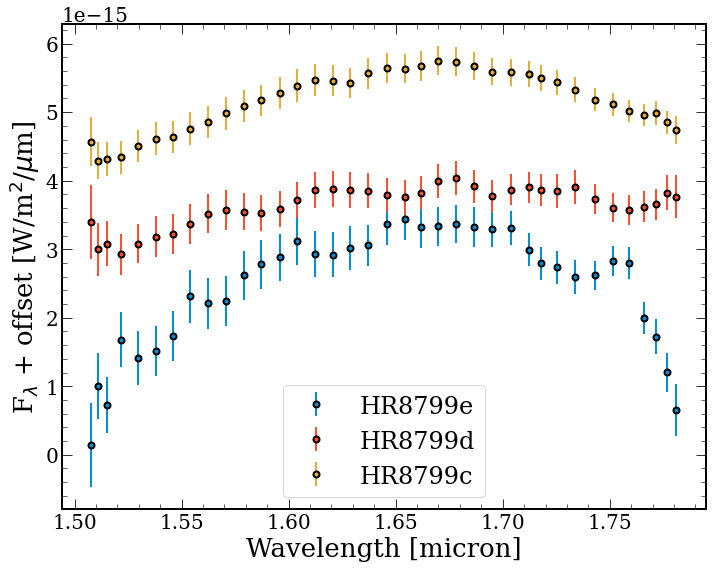

In [21]:
#GPI
instrument = "GPI"
scale = 1

files = sorted(glob(f"{data_dir}*{instrument}*"))
files = ["HR8799e_GPIH_KLIP_2023_spectrum.fits",
         "HR8799d_GPIH_KLIP_2023_spectrum.fits",
         "HR8799c_GPIH_KLIP_2023_spectrum.fits"]
hduls = []
names = ["HR8799e","HR8799d","HR8799c"]
for f in files:
    print(f)
    #names.append(f.split(data_dir)[-1].split('_')[0])

    hdul = fits.open(data_dir+f)
    hdul.info()
    hduls.append(hdul)
    spectrum = np.array(hdul['SPECTRUM'].data)
    
fig, ax = plt.subplots(figsize = (10,8))
for i,h in enumerate(hduls):
    if not instrument in spectra.keys():
        spectra[instrument] = {}
    spectra[instrument][names[i]] = {"WAVELENGTH": h[1].data["WAVELENGTH"],
                                     "FLUX":h[1].data["FLUX"]*scale,
                                     "ERROR":np.sqrt(np.diag(h[1].data["COVARIANCE"]))*scale}
    offset = i * 1.5e-15
    ax.errorbar(h[1].data["WAVELENGTH"],
                h[1].data["FLUX"]*scale +offset,
                yerr = np.sqrt(np.diag(h[1].data["COVARIANCE"]))*scale,
                label = names[i],
                marker = 'o',
                markersize = 6,
                markeredgewidth=2,
                linewidth = 0,
                elinewidth = 2,
                color = colour_dict[names[i]])
ax.legend()
ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)

#plt.savefig(f"plots/HR8799_{instrument}_pub_spectra_{version}.pdf",bbox_inches = 'tight')

observations/HR8799c_CHARIS_average.dat
observations/HR8799d_CHARIS_average.dat
observations/HR8799e_CHARIS_average.dat


/Users/nasedkin/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Text(0, 0.5, 'F$_{\\lambda}$ + offset [W/m$^{2}$/$\\mu$m]')

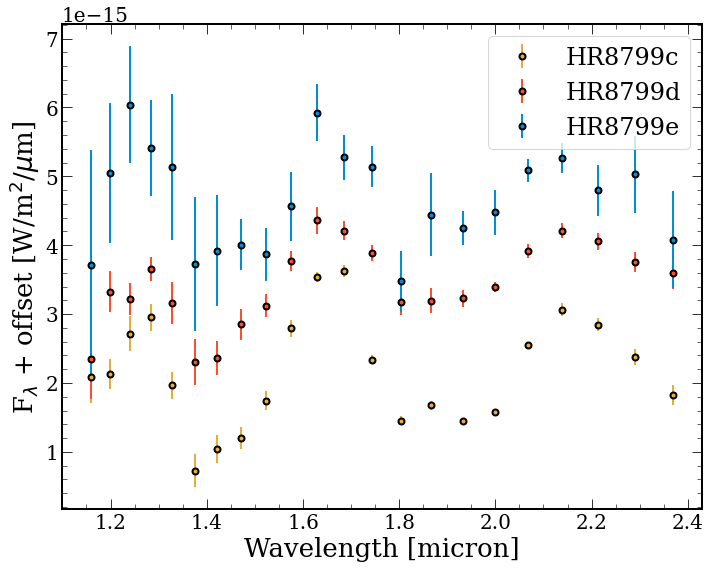

In [22]:
#CHARIS
instrument = "CHARIS"
scale = 1

files = sorted(glob(f"{data_dir}*{instrument}*"))
data = []
names = []
for f in files:
    print(f)
    names.append(f.split(data_dir)[-1].split('_')[0])
    data.append(np.genfromtxt(f).T)

    
fig, ax = plt.subplots(figsize = (10,8))
for i,d in enumerate(data):
    if not instrument in spectra.keys():
        spectra[instrument] = {}
    spectra[instrument][names[i]] = {"WAVELENGTH": d[0],
                                     "FLUX":d[1]*scale,
                                     "ERROR":d[2]*scale}
    offset = i * 1.5e-15
    ax.errorbar(d[0],
                d[1] +offset,
                yerr = d[2],
                label = names[i],
                marker = 'o',
                markersize = 6,
                markeredgewidth=2,
                linewidth = 0,
                elinewidth = 2,
                color = colour_dict[names[i]])
ax.legend()
ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)

#plt.savefig(f"plots/HR8799_{instrument}_pub_spectra_{version}.pdf",bbox_inches = 'tight')

observations/HR8799c_ALES_TRAP2023_realdist.txt
observations/HR8799d_ALES_TRAP2023_realdist.txt
observations/HR8799e_ALES_TRAP2023_realdist.txt


/Users/nasedkin/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Text(0, 0.5, 'F$_{\\lambda}$ + offset [W/m$^{2}$/$\\mu$m]')

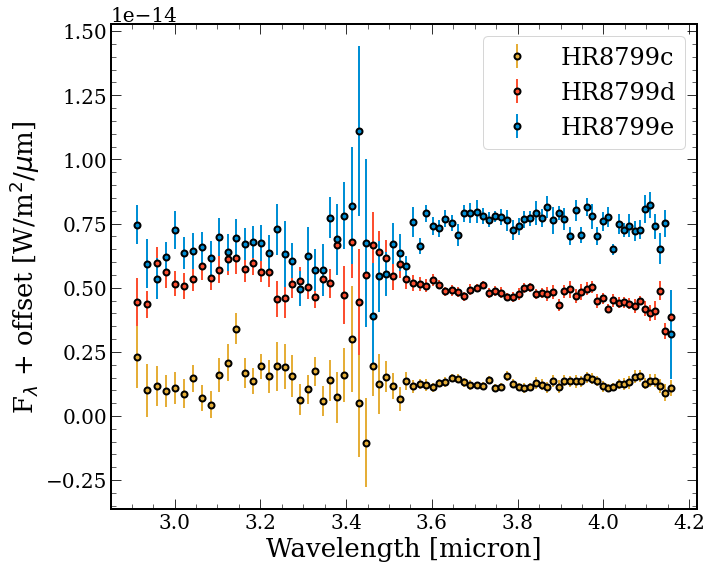

In [23]:
#ALES
instrument = "ALES"
scale = (41.2925/10)**2

"""files = sorted(glob(f"{data_dir}*{instrument}*"))
hduls = []
names = []
for f in files:
    print(f)
    names.append(f.split(data_dir)[-1].split('_')[1])
    hdul = fits.open(f)
    hdul.info()
    hduls.append(hdul)
    spectrum = np.array(hdul['SPECTRUM'].data)
    
print(names)
fig, ax = plt.subplots(figsize = (10,8))
for i,h in enumerate(hduls):
    if not instrument in spectra.keys():
        spectra[instrument] = {}
    spectra[instrument][names[i]] = {"WAVELENGTH": h[1].data["WAVELENGTH"],
                                     "FLUX":h[1].data["FLUX"]*scale,
                                     "ERROR":np.sqrt(np.diag(h[1].data["COVARIANCE"]))*scale}
    offset =i * 1.5e-16
    ax.errorbar(h[1].data["WAVELENGTH"],
                h[1].data["FLUX"]*scale +offset,
                yerr = np.sqrt(np.diag(h[1].data["COVARIANCE"]))*scale,
                label = names[i],
                marker = 'o',
                markersize = 6,
                markeredgewidth=2,
                linewidth = 0,
                elinewidth = 2,
                color = colour_dict[names[i]])
ax.legend()
ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)"""

#CHARIS
instrument = "ALES"
#scale = 1

files = sorted(glob(f"{data_dir}*{instrument}*.txt"))
data = []
names = []
for f in files:
    print(f)
    names.append(f.split(data_dir)[-1].split('_')[0])
    data.append(np.genfromtxt(f).T)

    
fig, ax = plt.subplots(figsize = (10,8))
for i,d in enumerate(data):
    if not instrument in spectra.keys():
        spectra[instrument] = {}
    spectra[instrument][names[i]] = {"WAVELENGTH": d[0],
                                     "FLUX":d[1]*scale,
                                     "ERROR":d[2]*scale}
    offset = i * 3e-15
    ax.errorbar(d[0],
                d[1]*scale +offset,
                yerr = d[2]*scale,
                label = names[i],
                marker = 'o',
                markersize = 6,
                markeredgewidth=2,
                linewidth = 0,
                elinewidth = 2,
                color = colour_dict[names[i]])
ax.legend()
ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)

#plt.savefig(f"plots/HR8799_{instrument}_pub_spectra_{version}.pdf",bbox_inches = 'tight')


/Users/nasedkin/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


hr8799b_osiris_hk_2011.txt
hr8799c_osiris_2013.dat


Text(0, 0.5, 'Normalised F$_{\\lambda}$+offset')

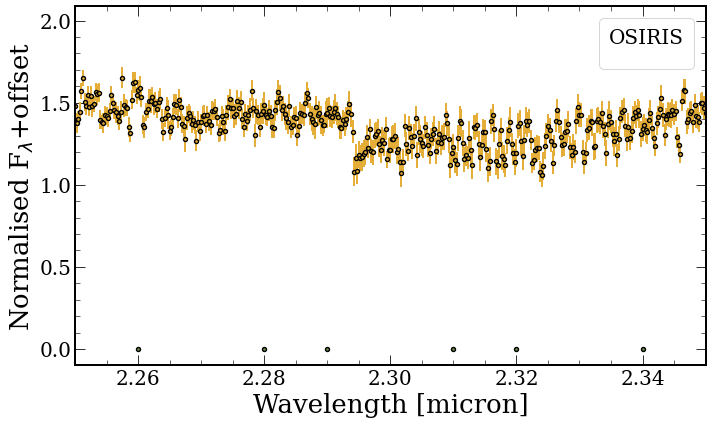

In [26]:
#OSIRIS
instrument = "OSIRIS"
scale = 1

files = ["hr8799b_osiris_hk_2011.txt","hr8799c_osiris_2013.dat"]
data = []
names = []
for f in files:
    print(f)
    names.append(f.split(data_dir)[-1].split('_')[0].upper().replace("B","b").replace("C","c"))
    data.append(np.genfromtxt(f"{data_dir}{f}",skip_header=True).T)

fig, ax = plt.subplots(figsize = (10,6))
for i,d in enumerate(data):
    if names[i]=="HR8799b":
        flux = 3e-12*data[i][1]*1e-3/(data[i][0])**2
        err = 3e-12*data[i][2]*1e-3/(data[i][0])**2 
        wlen = d[0]
        #flux = data[i][1]/(data[i][0])**2
        #err = data[i][2]/(data[i][0])**2 
        #norm = np.max(flux)
        #flux/=norm
        #err/=norm
        hinds = np.where(wlen < 1.9)
        kinds = np.where(wlen > 1.9)
        if not instrument+"H" in spectra.keys():
            spectra[instrument+"H"] = {}
        if not instrument+"K" in spectra.keys():
            spectra[instrument+"K"] = {}
        spectra[instrument + "H"][names[i]] = {"WAVELENGTH": wlen[hinds],
                                        "FLUX":flux[hinds]*scale,
                                        "ERROR":err[hinds]*scale}
        spectra[instrument + "K"][names[i]] = {"WAVELENGTH": wlen[kinds],
                                        "FLUX":flux[kinds]*scale,
                                        "ERROR":err[kinds]*scale}
    else:  
        if not instrument in spectra.keys():
            spectra[instrument] = {}
        flux = data[i][1]
        err = data[i][2]
        spectra[instrument][names[i]] = {"WAVELENGTH": d[0],
                                        "FLUX":flux*scale,
                                        "ERROR":err*scale}
    offset = i/2 
    ax.errorbar(d[0],
                flux +offset,
                yerr = err,
                label = "",
                marker = 'o',
                markersize = 4,
                markeredgewidth=1.4,
                linewidth = 0,
                elinewidth = 2,
                color = colour_dict[names[i]])
ax.set_xlim(2.25,2.35)
ax.legend(title = 'OSIRIS')
ax.set_xlabel(xlabel)
ax.set_ylabel(r'Normalised F$_{\lambda}$+offset')

#plt.savefig(f"plots/HR8799_{instrument}_pub_spectra_{version}.pdf",bbox_inches = 'tight')


/Users/nasedkin/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


dict_keys(['GRAVITY', 'SPHERE', 'GPI', 'CHARIS', 'ALES', 'OSIRIS', 'OSIRISH', 'OSIRISK'])


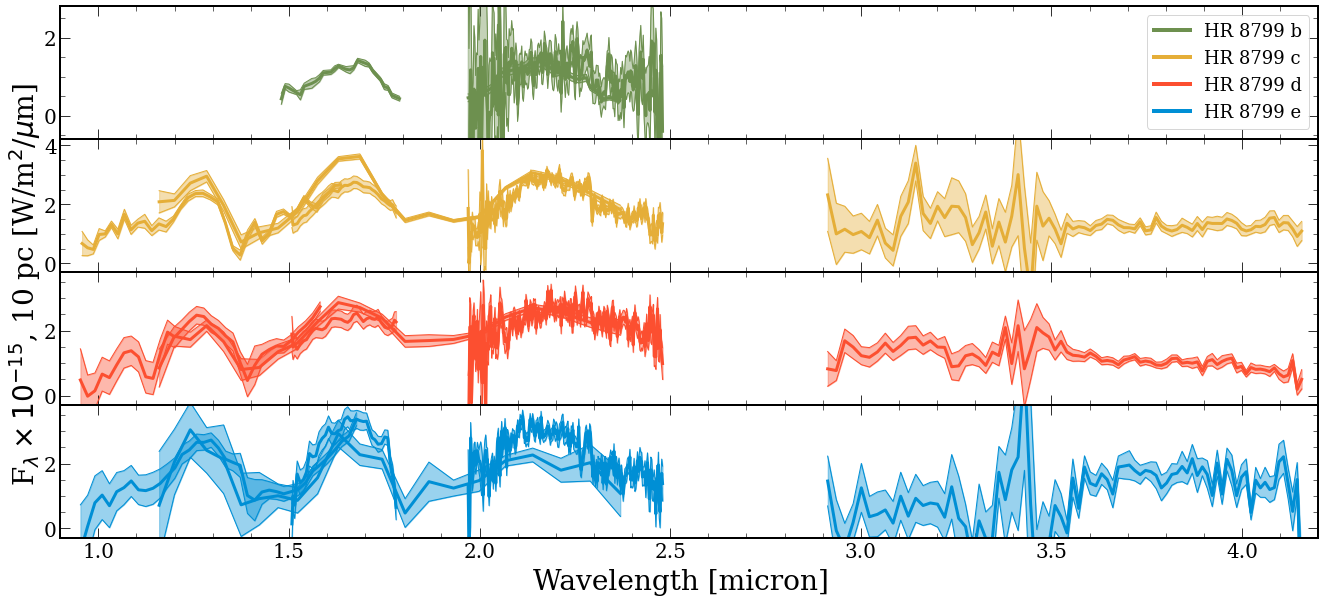

In [30]:
fig, axes = plt.subplots(nrows=4,figsize = (18,8),sharex = True, gridspec_kw={'hspace':0})
ax = axes.flatten()
print(spectra.keys())
instruments = ['SPHERE', 'CHARIS', 'GPI', 'GRAVITY', 'ALES', 'OSIRISH', 'OSIRISK']
planets = ["HR8799b","HR8799c","HR8799d","HR8799e"]
for i,planet in enumerate(planets):
        count = 0
        for j,inst in enumerate(instruments):
                scale = 1.0
                specs = spectra[inst]
                offset = 0
                lab = None

                if not planet in specs.keys():
                        continue
                if count == 0:
                        lab = planet
                count +=1

                """ax[i].errorbar(specs[planet]["WAVELENGTH"],
                               specs[planet]["FLUX"]/1e-15,
                               yerr=specs[planet]['ERROR']/1e-13,color = colour_dict[planet])"""
                if planet == "HR8799d"  and inst == 'ALES':
                        scale = 0.57 #Median ATMO fit scale factor 0.6
                if planet == "HR8799c"  and inst == 'OSIRIS':
                        continue
                if planet == "HR8799b"  and 'OSIRIS' in inst:
                        scale = 1.27

                """ax[i].errorbar(specs[planet]["WAVELENGTH"],
                               specs[planet]["FLUX"]/1e-15,
                               yerr=specs[planet]['ERROR']/1e-13,color = colour_dict[planet])"""
                ax[i].fill_between(specs[planet]['WAVELENGTH'], 
                        (specs[planet]['FLUX']-specs[planet]['ERROR'])*scale/1e-15 + offset,
                        (specs[planet]['FLUX']+specs[planet]['ERROR'])*scale/1e-15 + offset,
                        label = None, 
                        color = colour_dict[planet],
                        alpha = 0.4)
                ax[i].plot(specs[planet]['WAVELENGTH'], 
                        (specs[planet]['FLUX'])*scale/1e-15 + offset, 
                        color = colour_dict[planet],
                        label = lab,
                        linewidth = 3)
                ax[i].plot(specs[planet]['WAVELENGTH'], 
                        (specs[planet]['FLUX']-specs[planet]['ERROR'])*scale/1e-15 + offset, 
                        color = colour_dict[planet],
                        linewidth = 1)
                ax[i].plot(specs[planet]['WAVELENGTH'], 
                        (specs[planet]['FLUX']+specs[planet]['ERROR'])*scale/1e-15 + offset, 
                        color = colour_dict[planet],
                        linewidth = 1)


fig.text(0.5, -0.03, 'Wavelength [micron]', ha='center', fontsize = 28)
fig.text(-0.02, 0.5, r'F$_{\lambda}\times10^{-15}$, 10 pc [W/m$^{2}$/$\mu$m]', va='center', rotation='vertical', fontsize = 28)
"""
model_dir = "/Users/nasedkin/Documents/RetrievalResults/HR8799_2023_Retrievals/"
b_rets = ["b_free", "b_full"]
c_rets = ["c_free", "c_full"]
d_rets = ["d_free", "d_full"]
e_rets = ["e_free", "e_full"]

for b in b_rets:
        medfiles = glob(f"{model_dir}{b}/evaluate_*/*median_model_full.npy") 
        for f in medfiles:
                wlen,spec = np.load(f).T
                ax[0].plot(wlen,spec/1e-15, color = "tab:green", linewidth = 1, alpha = 0.1)

for c in c_rets:
        medfiles = glob(f"{model_dir}{c}/evaluate_*/*median_model_full.npy") 
        for f in medfiles:
                wlen,spec = np.load(f).T
                ax[1].plot(wlen,spec/1e-15, color = "tab:yellow", linewidth = 1, alpha = 0.1)

for d in d_rets:
        medfiles = glob(f"{model_dir}{d}/evaluate_*/*median_model_full.npy") 
        for f in medfiles:
                wlen,spec = np.load(f).T
                ax[2].plot(wlen,spec/1e-15, color = "tab:orange", linewidth = 1, alpha = 0.1)

for e in e_rets:
        medfiles = glob(f"{model_dir}{e}/evaluate_*/*median_model_full.npy") 
        for f in medfiles:
                wlen,spec = np.load(f).T
                ax[3].plot(wlen,spec/1e-15, color = "tab:blue", linewidth = 1, alpha = 0.1)
"""
ax[0].set_ylim(-0.6,2.8)
ax[1].set_ylim(-0.3,4.2)
ax[2].set_ylim(-0.3,3.8)
ax[3].set_ylim(-0.3,3.8)


ax[0].set_xlim(0.9,4.2)
ax[1].set_xlim(0.9,4.2)
ax[2].set_xlim(0.9,4.2)
ax[3].set_xlim(0.9,4.2)


from matplotlib.lines import Line2D
custom_lines = [Line2D([0], [0], color=colour_dict["HR8799b"], lw=4),
                Line2D([0], [0], color=colour_dict["HR8799c"], lw=4),
                Line2D([0], [0], color=colour_dict["HR8799d"], lw=4),
                Line2D([0], [0], color=colour_dict["HR8799e"], lw=4)
                ]
ax[0].legend(custom_lines, ['HR 8799 b', 'HR 8799 c', 'HR 8799 d','HR 8799 e'],loc = 'upper right',fontsize=18)

plt.savefig(f"plots/HR8799AllSpectralData_{version}.pdf",bbox_inches='tight')


In [11]:
import numpy as np
np.linspace(1,10,10,dtype = int)

/Users/nasedkin/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

/Users/nasedkin/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(39,) (39,)


<ErrorbarContainer object of 3 artists>

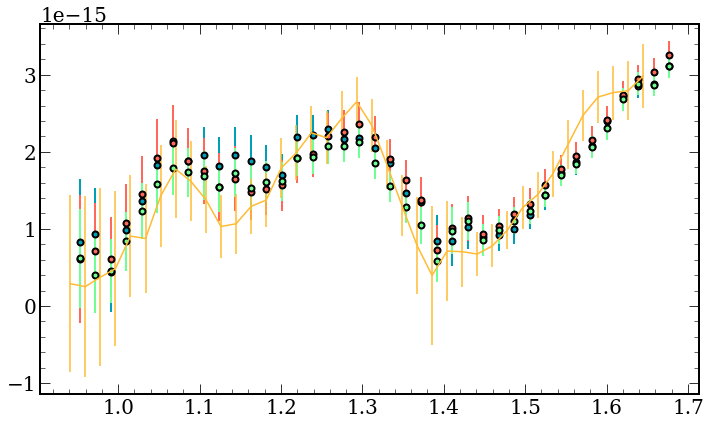

In [12]:

data_dir = "/Users/nasedkin/data/HR8799/final_injections/VIPpreprocZurlo/andromeda/"
fold = "SPHEREYJH_HR8799e_spectrum_localerror.fits"
fnew = "SPHEREYJH_HR8799e_2023_spectrum_localerror.fits"
flsq = "SPHEREYJH_HR8799e_2023_lsq_spectrum_localerror.fits"

fnewsnr = "SPHEREYJH_HR8799e_2023_snrs.fits"
flsqsnr = "SPHEREYJH_HR8799e_2023_lsq_snrs.fits"
fnewcont = "SPHEREYJH_HR8799e_2023_residuals.fits"
flsqcont = "SPHEREYJH_HR8799e_2023_lsq_residuals.fits"

hduold = fits.open(data_dir + fold)
hdunew = fits.open(data_dir + fnew)
hdulsq = fits.open(data_dir + flsq)
newsnr = fits.open(data_dir + fnewsnr)[0].data
lsqsnr = fits.open(data_dir + flsqsnr)[0].data

posn = (179,130)
patch = np.sum(newsnr,axis=0)[int(posn[1])-5:int(posn[1])+5,int(posn[0])-5:int(posn[0])+5]
loc = np.where(patch == patch.max())

patch2 = np.sum(lsqsnr,axis=0)[int(posn[1])-5:int(posn[1])+5,int(posn[0])-5:int(posn[0])+5]
loclsq = np.where(patch2 == patch2.max())

newcont= fits.open(data_dir + fnewcont)[0].data
lsqcont= fits.open(data_dir + flsqcont)[0].data

newcontspec= []
lsqcontspec= []

for i in range(len(hduold[1].data["WAVELENGTH"])):
    p1 = newcont[i,int(posn[1])-5:int(posn[1])+5,int(posn[0])-5:int(posn[0])+5]
    p2 = lsqcont[i,int(posn[1])-5:int(posn[1])+5,int(posn[0])-5:int(posn[0])+5]

    newcontspec.append(p1[loc[0][0],loc[1][0]])
    lsqcontspec.append(p2[loclsq[0][0],loclsq[1][0]])
newcontspec = np.array(newcontspec)
lsqcontspec = np.array(lsqcontspec)

print(newcontspec.shape,lsqcontspec.shape)
fig, ax = plt.subplots(figsize = (10,6))
scale = 1#(60/8)
offset = 0

ax.errorbar(hduold[1].data["WAVELENGTH"],
        hduold[1].data["FLUX"],
        yerr = np.sqrt(np.diag(hduold[1].data["COVARIANCE"]))*scale,
        label = "Old",
        marker = 'o',
        markersize = 6,
        markeredgewidth=2,
        linewidth = 0,
        elinewidth = 2)

ax.errorbar(hdunew[1].data["WAVELENGTH"],
        hdunew[1].data["FLUX"],
        yerr = np.sqrt(np.diag(hdunew[1].data["COVARIANCE"]))*scale,
        label = "New",
        marker = 'o',
        markersize = 6,
        markeredgewidth=2,
        linewidth = 0,
        elinewidth = 2)

ax.errorbar(hdulsq[1].data["WAVELENGTH"],
        hdulsq[1].data["FLUX"],
        yerr = np.sqrt(np.diag(hdulsq[1].data["COVARIANCE"]))*scale,
        label = "lsq",
        marker = 'o',
        markersize = 6,
        markeredgewidth=2,
        linewidth = 0,
        elinewidth = 2)

from spectres import spectres
wlen,spectrum,err = np.genfromtxt("/Users/nasedkin/Documents/HR8799/HR8799e_SPHERE_2016.dat",delimiter = ',').T

ax.errorbar(wlen,spectrum, yerr = err)


/Users/nasedkin/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


dict_keys(['GRAVITY', 'SPHERE', 'GPI', 'CHARIS', 'ALES', 'OSIRIS'])
/Users/nasedkin/Documents/Paper2_HR8799_Notebooks/grid_fit_spectra/HR 8799 e_petrus2023_fitcorr_newales_R500_BestFitChi2.dat
/Users/nasedkin/Documents/Paper2_HR8799_Notebooks/grid_fit_spectra/HR 8799 e_petitcode-hot-cloudy_fitcorr_newales_R500_BestFitChi2.dat
/Users/nasedkin/Documents/Paper2_HR8799_Notebooks/grid_fit_spectra/HR 8799 e_exo-rem_fitcorr_newales_R500_BestFitChi2.dat
/Users/nasedkin/Documents/Paper2_HR8799_Notebooks/grid_fit_spectra/HR 8799 e_diamondback_fitcorr_newales_R500_BestFitChi2.dat


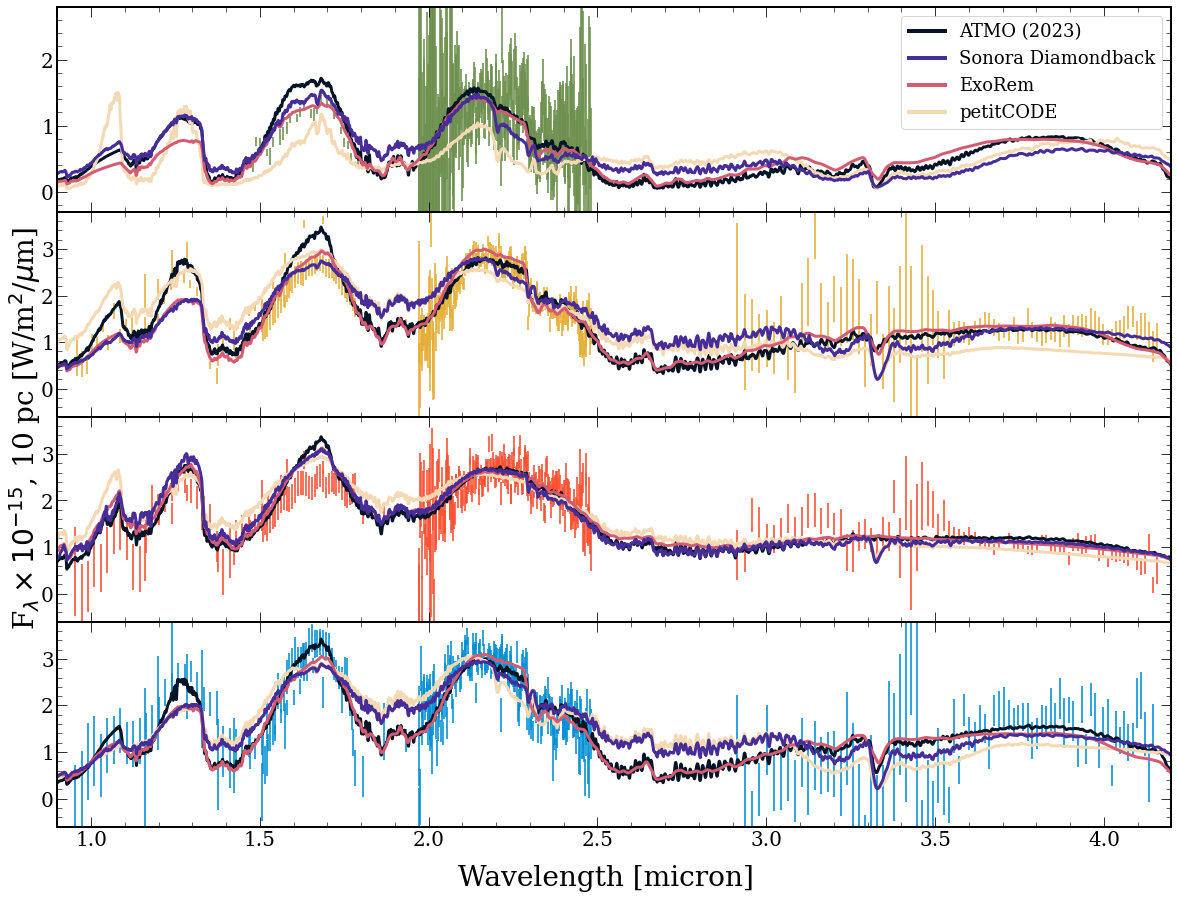

In [15]:
fig, axes = plt.subplots(nrows=4,figsize = (16,12),sharex = True, gridspec_kw={'hspace':0})
ax = axes.flatten()
print(spectra.keys())
instruments = ['SPHERE', 'CHARIS', 'GPI', 'GRAVITY', 'ALES', 'OSIRIS']
planets = ["HR8799b","HR8799c","HR8799d","HR8799e"]
for i,planet in enumerate(planets):
        count = 0
        for j,inst in enumerate(instruments):
                scale = 1.0
                specs = spectra[inst]
                offset = 0
                lab = None

                if not planet in specs.keys():
                        continue
                if count == 0:
                        lab = planet
                count +=1

                """ax[i].errorbar(specs[planet]["WAVELENGTH"],
                               specs[planet]["FLUX"]/1e-15,
                               yerr=specs[planet]['ERROR']/1e-13,color = colour_dict[planet])"""
                if planet == "HR8799d"  and inst == 'ALES':
                        scale = 0.57 #Median ATMO fit scale factor 0.6
                if planet == "HR8799c"  and inst == 'OSIRIS':
                        continue
                if planet == "HR8799b"  and inst == 'OSIRIS':
                        scale = 1.27
                ax[i].errorbar(specs[planet]['WAVELENGTH'], 
                        specs[planet]['FLUX']*scale/1e-15,
                        specs[planet]['ERROR']*scale/1e-15,
                        label = None, 
                        color = colour_dict[planet],
                        linewidth = 0,
                        elinewidth = 1.6,
                        markersize = 6,
                        markeredgewidth = 2,
                        marker = None,#'o',
                        alpha = 1,
                        zorder = 1)



fig.text(0.5, -0.03, 'Wavelength [micron]', ha='center', fontsize = 28)
fig.text(-0.02, 0.5, r'F$_{\lambda} \times 10^{-15}$, 10 pc [W/m$^{2}$/$\mu$m]', va='center', rotation='vertical', fontsize = 28)

model_dir = "/Users/nasedkin/Documents/Paper2_HR8799_Notebooks/grid_fit_spectra/"

qual_map = sc.ScicoSequential(cmap='heat')
fixed_cmap = qual_map.get_mpl_color_map()
model_colour_dict = {"exo-rem":fixed_cmap(6/10),
                     "diamondback":fixed_cmap(3/10),
                     "petrus2023":fixed_cmap(1/10),
                     "petitcode-hot-cloudy":fixed_cmap(9/10),
                     "petitcode-cool-cloudy":fixed_cmap(9/10)}

bfiles = sorted(glob(f"{model_dir}*HR 8799 b*")) 
bfiles.reverse()

for f in bfiles:
        if "3500" in f: continue
        if not "fitcorr" in f:continue
        if not "Chi2" in f:continue
        if "cholla" in f:continue
        if "bobcat" in f:continue
        if "hot" in f:continue
        wlen,spec = np.genfromtxt(f).T
        model_name = f.split('/')[-1].split('_')[1]
        model_color = model_colour_dict[model_name]
        ax[0].plot(wlen,spec*distance_scale/1e-15, color = model_color, linewidth = 3, alpha = 1)
        wlen_old = wlen

cfiles = sorted(glob(f"{model_dir}*HR 8799 c*")) 
cfiles.reverse()

for f in cfiles:
        #if "3500" in f: continue
        if "3500" in f : 
                continue
        if not "fitcorr" in f:continue
        if not "newales" in f:continue
        if not "Chi2" in f:continue
        if "cholla" in f:continue
        if "bobcat" in f:continue
        wlen,spec = np.genfromtxt(f).T
        #if "3500" in f and "diamondback in f": 
        #        spec = spectres(wlen_old,wlen,spec)
        #        wlen = wlen_old
        model_name = f.split('/')[-1].split('_')[1]
        model_color = model_colour_dict[model_name]
        ax[1].plot(wlen,spec*distance_scale/1e-15, color = model_color, linewidth = 3, alpha = 1)
        wlen_old = wlen
dfiles = sorted(glob(f"{model_dir}*HR 8799 d*")) 
dfiles.reverse()

for f in dfiles:
        if "3500" in f: continue
        if not "fitcorr" in f:continue
        if not "newales" in f:continue
        #if not "scaled" in f:continue
        if not "Chi2" in f:continue
        if "cholla" in f:continue
        if "bobcat" in f:continue
        wlen,spec = np.genfromtxt(f).T
        model_name = f.split('/')[-1].split('_')[1]
        model_color = model_colour_dict[model_name]
        ax[2].plot(wlen,spec*distance_scale/1e-15, color = model_color, linewidth = 3, alpha = 1)

efiles = sorted(glob(f"{model_dir}*HR 8799 e*")) 
efiles.reverse()

for f in efiles:
        if "3500" in f: continue
        if not "fitcorr" in f:continue
        if not "newales" in f:continue
        if "scaled" in f:continue
        if not "Chi2" in f:continue
        if "cholla" in f:continue
        if "bobcat" in f:continue
        print(f)
        wlen,spec = np.genfromtxt(f).T
        
        model_name = f.split('/')[-1].split('_')[1]
        model_color = model_colour_dict[model_name]
        ax[3].plot(wlen,spec*distance_scale/1e-15, color = model_color, linewidth = 3, alpha = 1)

ax[0].set_ylim(-0.3,2.8)
ax[1].set_ylim(-0.6,3.8)
ax[2].set_ylim(-0.6,3.8)
ax[3].set_ylim(-0.6,3.8)


ax[0].set_xlim(0.9,4.2)
ax[1].set_xlim(0.9,4.2)
ax[2].set_xlim(0.9,4.2)
ax[3].set_xlim(0.9,4.2)


from matplotlib.lines import Line2D
custom_lines = [Line2D([0], [0], color=model_colour_dict["petrus2023"], lw=4),
                Line2D([0], [0], color=model_colour_dict["diamondback"], lw=4),
                Line2D([0], [0], color=model_colour_dict["exo-rem"], lw=4),   
                Line2D([0], [0], color=model_colour_dict["petitcode-hot-cloudy"], lw=4)
                ]
ax[0].legend(custom_lines, ['ATMO (2023)', 'Sonora Diamondback','ExoRem','petitCODE'],loc = 'upper right',fontsize=18)

plt.savefig(f"plots/HR8799AllSpectralData_gridfits_{version}.pdf",bbox_inches='tight')